**（1）任务描述**

* 手写识别是常见的图像识别任务。
* 计算机通过手写体图片来识别出图片中的字,与印刷字体不同的是，不同人的手写体风格迥异，大小不一，造成了计算机对手写识别任务的一些困难。
* 数字手写体识别由于其有限的类别(0~9共10个数字)，成为了相对简单的手写识别任务。
* 手写数字识别是一个多分类问题，共有10个分类，每个手写数字图像的类别标签是0~9中的其中一个数。

**（2）数据说明**
1. 下载链接：http://yann.lecun.com/exdb/mnist/
1. MNIST是一个包含数字0~9的手写体图片数据集,图片已归一化为以手写数字为中心的28*28规格的图片。
1. MNIST由训练集与测试集两个部分组成,各部分规模如下:
*   训练集:60,000个手写体图片及对应标签
*   测试集:10,000个手写体图片及对应标签


**（3）要求**
* 实验步骤包括：数据处理、数据降维、模型训练和模型评估。
* 必须至少使用四种以上不同的分类模型进行训练（如神经网络、支持向量机、集成学习、感知机、KNN等），对比它们在测试集上的性能表现（准确率），并对结果进行分析与讨论。
* 务必输出结果对比分析结果以及最终所有模型的平均准确率。


# 手写体数字识别

## 0 前导

In [44]:
# 使用PCA主成分分析法对MNIST数据集进行降维 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler

# 注意：这里使用fetch_openml来直接从OpenML平台获取MNIST数据集
mnist = fetch_openml('mnist_784', version=1)
x = mnist.data / 255.0  # 数据标准化
y = mnist.target.astype(int)
# 初始化PCA模型
pca = PCA()

# 可以自己指定维度
pca.fit(x)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
dim_to_keep = np.argmax(cumulative_variance >= 0.95) + 1
print(f"选择前{dim_to_keep}个主成分以保留至少95%的方差")


d:\forPy\lib\site-packages\pandas\core\arrays\categorical.py:528: RuntimeWarning: invalid value encountered in cast
  fill_value = lib.item_from_zerodim(np.array(np.nan).astype(dtype))


选择前154个主成分以保留至少95%的方差


## 1 svm支持向量机算法

### 1.1 导入必要的包

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf



### 1.2 加载MNIST数据集

In [2]:
# 加载MNIST数据集
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### 1.3 数据归一化处理

In [3]:
# 数据预处理：缩放和归一化
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
x_train = x_train.reshape((x_train.shape[0], -1))
x_test = x_test.reshape((x_test.shape[0], -1))

### 1.4 特征压缩

In [4]:
# 可选：特征缩放
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### 1.5 创建好分类器

In [5]:
# 创建SVM分类器实例
clf = svm.SVC(kernel='rbf', C=1, gamma='scale') # 'rbf'核函数是一个常用选择

### 1.6 训练模型

In [6]:

# 训练模型
clf.fit(x_train, y_train)

# 预测测试集
y_pred = clf.predict(x_test)

# 打印分类报告
print("Classification report:\n", metrics.classification_report(y_test, y_pred))

Classification report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.96      1032
           3       0.97      0.97      0.97      1010
           4       0.97      0.96      0.97       982
           5       0.96      0.96      0.96       892
           6       0.98      0.97      0.98       958
           7       0.93      0.96      0.94      1028
           8       0.96      0.95      0.96       974
           9       0.97      0.94      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



### 1.7 打印最后结果

In [7]:
# 计算准确率
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 96.61%


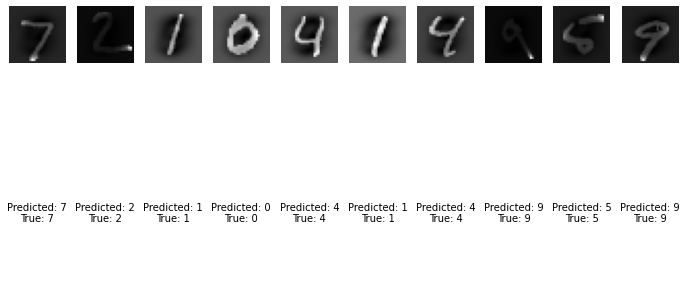

In [11]:
def plot_images(images, predictions, true_labels, n=10):
    fig, axs = plt.subplots(2, n, figsize=(12, 6))
    for i in range(n):
        axs[0][i].imshow(images[i].reshape(28, 28), cmap='gray')
        axs[0][i].axis('off')
        axs[1][i].text(0.5, 0.5, f'Predicted: {predictions[i]}\nTrue: {true_labels[i]}',
                       horizontalalignment='center', verticalalignment='center', transform=axs[1][i].transAxes)
        axs[1][i].axis('off')
    plt.show()

# 随机选择一些样本进行可视化
images_and_predictions = list(zip(x_test[:20], y_pred[:20], y_test[:20]))
plot_images(*zip(*images_and_predictions))

## 2 KNN近邻算法

步骤基本上大差不差，都是先导入包、数据预处理、训练之类，不再赘述。

### 2.1 导入包

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import tensorflow as tf

### 2.3 加载并预处理数据

In [9]:
# 加载MNIST数据集
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 数据预处理：缩放和归一化
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
x_train = x_train.reshape((x_train.shape[0], -1))
x_test = x_test.reshape((x_test.shape[0], -1))

# 特征缩放
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### 2.4 训练模型

In [10]:
# 创建KNN分类器实例
knn = KNeighborsClassifier(n_neighbors=4) # 选择4个最近的邻居

# 训练模型
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=4)

### 2.5 模型的评估

In [12]:
# 预测测试集
y_pred = knn.predict(x_test)

# 打印分类报告
print("Classification report:\n", metrics.classification_report(y_test, y_pred))

# 计算准确率
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Classification report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       980
           1       0.95      0.99      0.97      1135
           2       0.96      0.94      0.95      1032
           3       0.92      0.96      0.94      1010
           4       0.94      0.94      0.94       982
           5       0.93      0.92      0.93       892
           6       0.96      0.96      0.96       958
           7       0.93      0.93      0.93      1028
           8       0.97      0.90      0.93       974
           9       0.94      0.90      0.92      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000

Accuracy: 94.43%


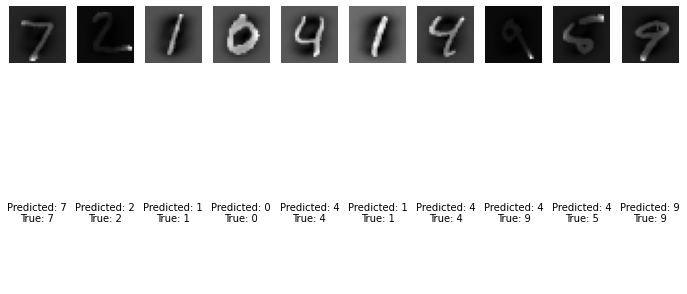

In [13]:
def plot_images(images, predictions, true_labels, n=10):
    fig, axs = plt.subplots(2, n, figsize=(12, 6))
    for i in range(n):
        axs[0][i].imshow(images[i].reshape(28, 28), cmap='gray')
        axs[0][i].axis('off')
        axs[1][i].text(0.5, 0.5, f'Predicted: {predictions[i]}\nTrue: {true_labels[i]}',
                       horizontalalignment='center', verticalalignment='center', transform=axs[1][i].transAxes)
        axs[1][i].axis('off')
    plt.show()

# 随机选择一些样本进行可视化
images_and_predictions = list(zip(x_test[:20], y_pred[:20], y_test[:20]))
plot_images(*zip(*images_and_predictions))

单从这个结果上看，KNN近邻算法不如SVM支持向量机方法。

## 3 决策树算法

### 3.1 导包

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import tensorflow as tf

### 3.2 预处理数据

In [26]:
# 加载MNIST数据集
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 数据预处理：缩放并转换为一维数组
x_train = x_train.reshape(x_train.shape[0], -1) / 255.0
x_test = x_test.reshape(x_test.shape[0], -1) / 255.0

# 可选：进一步的数据划分，例如交叉验证
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

### 3.2 预测数据

In [27]:
# 创建决策树分类器实例
clf = tree.DecisionTreeClassifier(random_state=42)

# 训练模型
clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

### 3.3 打印结果

In [28]:
# 在验证集上评估模型
y_val_pred = clf.predict(x_val)
print("Validation set classification report:\n", classification_report(y_val, y_val_pred))

# 计算准确率
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

# 如果需要，也可以在测试集上评估
y_test_pred = clf.predict(x_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Validation set classification report:
               precision    recall  f1-score   support

           0       0.92      0.90      0.91      1175
           1       0.93      0.96      0.95      1322
           2       0.85      0.85      0.85      1174
           3       0.84      0.84      0.84      1219
           4       0.86      0.87      0.86      1176
           5       0.83      0.81      0.82      1104
           6       0.90      0.89      0.90      1177
           7       0.90      0.91      0.90      1299
           8       0.82      0.79      0.80      1160
           9       0.82      0.84      0.83      1194

    accuracy                           0.87     12000
   macro avg       0.87      0.87      0.87     12000
weighted avg       0.87      0.87      0.87     12000

Validation Accuracy: 86.81%
Test Accuracy: 87.38%


## 4. 随机森林算法

### 4.1 导包

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import tensorflow as tf

### 4.2 预处理数据

In [32]:
# 加载MNIST数据集
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 数据预处理：缩放并转换为一维数组
x_train = x_train.reshape(x_train.shape[0], -1) / 255.0
x_test = x_test.reshape(x_test.shape[0], -1) / 255.0
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

### 4.3 训练模型

In [33]:
# 创建随机森林分类器实例
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# 训练模型
rf_clf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

### 4.4 模型的评估

In [34]:
# 在验证集上评估模型
y_val_pred = rf_clf.predict(x_val)
print("Validation set classification report:\n", classification_report(y_val, y_val_pred))

# 计算准确率
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

# 在测试集上评估
y_test_pred = rf_clf.predict(x_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Validation set classification report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      1175
           1       0.98      0.99      0.99      1322
           2       0.96      0.97      0.97      1174
           3       0.96      0.95      0.96      1219
           4       0.97      0.97      0.97      1176
           5       0.97      0.97      0.97      1104
           6       0.98      0.99      0.98      1177
           7       0.97      0.96      0.97      1299
           8       0.96      0.96      0.96      1160
           9       0.96      0.95      0.95      1194

    accuracy                           0.97     12000
   macro avg       0.97      0.97      0.97     12000
weighted avg       0.97      0.97      0.97     12000

Validation Accuracy: 96.93%
Test Accuracy: 96.87%


### 4.4 重要性评估

Feature ranking:
1. feature 378 (0.009283911486923287)
2. feature 377 (0.009254336318711934)
3. feature 350 (0.00878925447845268)
4. feature 433 (0.008444789801548223)
5. feature 462 (0.008293251639195741)
6. feature 409 (0.007500280300550062)
7. feature 375 (0.007183050126660001)
8. feature 489 (0.007019328207643964)
9. feature 155 (0.006911512681346193)
10. feature 542 (0.006823359247407701)
11. feature 406 (0.0066430463316741115)
12. feature 211 (0.006489778487406625)
13. feature 210 (0.006416627401234356)
14. feature 238 (0.0062824562837976265)
15. feature 318 (0.006258941664741017)
16. feature 460 (0.006227442841545939)
17. feature 515 (0.0061862482456772625)
18. feature 405 (0.006167941989699524)
19. feature 154 (0.006127776092433359)
20. feature 437 (0.006019316786334878)
21. feature 540 (0.005984545807763289)
22. feature 461 (0.005972213031966136)
23. feature 543 (0.005869332268419838)
24. feature 487 (0.005769215906854769)
25. feature 465 (0.00572271259045026)
26. feature 322 

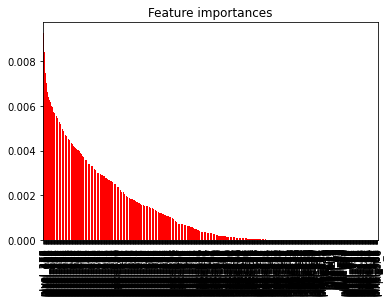

In [35]:
importances = rf_clf.feature_importances_
indices = np.argsort(importances)[::-1]

# 打印特征排名
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print(f"{f + 1}. feature {indices[f]} ({importances[indices[f]]})")

# 可视化特征重要性
plt.figure()
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(x_train.shape[1]), [f"pixel_{i}" for i in indices], rotation=90)
plt.xlim([-1, x_train.shape[1]])
plt.show()

## 5 卷积神经网络

#### 5.1 导包

In [45]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

#### 5.2 加载数据

In [37]:
# 加载MNIST数据集
mnist = datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 数据预处理
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train[..., tf.newaxis]  # 为图像增加颜色通道维度
x_test = x_test[..., tf.newaxis]

#### 5.4 模型的构建

In [38]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



d:\forPy\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### 5.5 模型的训练

In [39]:
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8958 - loss: 0.3376 - val_accuracy: 0.9866 - val_loss: 0.0405
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9842 - loss: 0.0498 - val_accuracy: 0.9903 - val_loss: 0.0321
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9900 - loss: 0.0318 - val_accuracy: 0.9909 - val_loss: 0.0309
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9917 - loss: 0.0244 - val_accuracy: 0.9898 - val_loss: 0.0330
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9939 - loss: 0.0173 - val_accuracy: 0.9897 - val_loss: 0.0316
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9945 - loss: 0.0171 - val_accuracy: 0.9903 - val_loss: 0.0382
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9964 - loss: 0.0115 - val_accuracy: 0.9903 - val_loss: 0.0376
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9967 - loss: 0

#### 5.6 评估模型

In [40]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')

313/313 - 1s - 3ms/step - accuracy: 0.9904 - loss: 0.0370

Test accuracy: 0.9904000163078308


#### 5.7 可视化

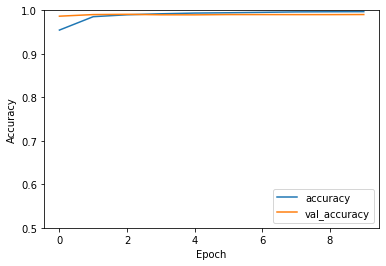

In [41]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

可以看到，神经网络在一开始的时候准确率不高，但得益于反向传播算法和adam算法(SGD也可以)，整个的训练模型的收敛速度很快，并且也有很高的准确率。

## 6 结果的对比

### 6.1 模型的排名

单单从正确率上来说，SVM支持向量机的准确率是96.61%，KNN近邻算法的准确率是94.43%,决策树是87.38%，随机森林算法准确度是96.78%,神经网络的准确率是99.04%。所以只看模型的准确度而不看模型的训练时间的话，那么排名是：
> 神经网络算法 > 随机森林算法 > SVM算法 > KNN近邻算法 > 决策树算法
神经网络算法的参数够多，同时训练周期也常，而且准确率最高；决策树算法的准确度较低，其它三种算法的准确度相当。


### 6.2 原因分析

首先，卷积神经网络（CNN）因为其复杂的网络特征和参数以及各种的优化方法，使得它比较适合手写数字识别任务的，并且在MNIST数据集上已经证明了其高效性和准确性。而决策树和随机森林，CNN能够自动学习并提取图像中的局部特征，从而也可以完成图像分类的任务。

决策树在手写数字识别上的表现不如SVM和CNN的原因应该是没有进行复杂的特征工程或剪枝，而且树的个数选择的较少,在后续可以使用更加多的树进行优化尝试。